In [16]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional, Conv2D, MaxPooling1D
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline
from keras.regularizers import l2
from keras.models import load_model
from keras import regularizers

In [17]:
#Read data form dataset
df = pd.read_csv('/content/dataset.csv', encoding='latin1', engine='python')

In [18]:
df.to_csv("/content/dataset.csv", header=["Incorrect", "Correct", "ID1", "ID2", "NA"], index=False)

In [19]:
Label = []*df.shape[0]
for i in range(0, df.shape[0]):
  Label = Label + ["Incorrect"]
for i in range(0, df.shape[0]):
  Label = Label + ["Correct"]

KeyboardInterrupt: ignored

In [ ]:
Sentence = df['Incorrect'].append(df["Correct"])
Sentence

In [ ]:
Sentence.shape

In [ ]:
#Get the labelled dataset
df1 = pd.DataFrame(list(zip(Sentence, Label)), 
               columns =['Sentence', 'Label']) 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Incorrect and correct sentences')

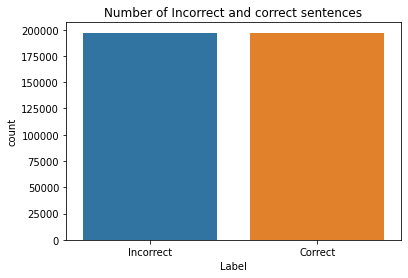

In [20]:

sns.countplot(df1.Label)
plt.xlabel('Label')
plt.title('Number of Incorrect and correct sentences')

In [21]:
X = df1.Sentence
Y = df1.Label
le = LabelEncoder()   # encode target labels to value betn 0 to (n_classes-1) 
Y = le.fit_transform(Y)   #now Y is a 1D array of 0 and 1
Y = Y.reshape(-1,1)    # convert Y in 2D array 

In [22]:
x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.20)

In [23]:
max_words = 15000                        #1000
max_len = 150
tok = Tokenizer(num_words=max_words) #turn each text into either a sequence of integers or into a vector 
tok.fit_on_texts(x_train.astype(str))            #turn words in X_train into sequences or index of a token in a dictionary
sequences = tok.texts_to_sequences(x_train.astype(str))
sequences
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)
sequences_matrix

array([[  0,   0,   0, ..., 127,  54,  79],
       [  0,   0,   0, ..., 187,  29,  17],
       [  0,   0,   0, ...,  69,   2,  63],
       ...,
       [  0,   0,   0, ...,  56,   7,  26],
       [  0,   0,   0, ..., 273,   3, 195],
       [  0,   0,   0, ...,   4, 169, 137]], dtype=int32)

In [41]:
def my_model():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64, kernel_regularizer= regularizers.l2(0.0001), return_sequences = True)(layer)
    layer = LSTM(32)(layer)
    layer = Dense(512,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [42]:
model = my_model()
model.summary()
from keras.optimizers import Adam
opt = Adam(learning_rate= 0.001)                                     #lr=0.001, momentum=0.9
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 150, 50)           750000    
_________________________________________________________________
lstm_5 (LSTM)                (None, 150, 64)           29440     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                12416     
_________________________________________________________________
FC1 (Dense)                  (None, 32)                1056      
_________________________________________________________________
activation_6 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)               

In [ ]:
model.fit(sequences_matrix,y_train,batch_size=128,epochs=50,
          validation_split=0.2)                                    #

In [32]:
model.save('/content/model_74.h5')

In [ ]:
test_sequences = tok.texts_to_sequences(x_test.astype(str))
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
accr = model.evaluate(test_sequences_matrix,y_test)

1815/1815 [==============================] - 14s 8ms/step - loss: 0.5232 - accuracy: 0.7259


In [ ]:
sample_text = ["He was in my skool",
                "  who are you?  ",
                "I work in Pvt company",
                "What are you doing?   ",
               "i will be success"]

In [ ]:
sample_sequence = tok.texts_to_sequences(sample_text)
sample_sequence_matrix = sequence.pad_sequences(sample_sequence, maxlen=max_len)

In [ ]:
pred = model.predict(sample_sequence_matrix)
pred.round()
result = list()
for i in pred.round():
  if i == 1:
    result.append("Incorrect")
  else:
    result.append("Correct")
result


['Incorrect', 'Correct', 'Incorrect', 'Correct', 'Incorrect']